# Assignment 4 - Random Forests and Gradient Boosting
MSDS 422 - SEC 57 THURSDAY

FERDYNAND HEBAL - 7/21/2019

In this assignment, linear, elastic net, random forest, and gradient boost regression are evaluated using root mean-squared error (RMSE) as an index of prediction error. All explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study are used to predict the response variable: the median value of homes.

Regarding the management problem, these results suggest that Gradient Boost Regression with Early stopping is the better model given its low RMSE compared to the others and accounting for overfitting.

In [1]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
def scoring(reg, y_test,X_test, y_train, X_train):
    y_pred = reg.predict(X_train)
    print("RMSE train",np.sqrt(mean_squared_error(y_train, y_pred)))
    y_pred = reg.predict(X_test)
    print("RMSE test",np.sqrt(mean_squared_error(y_test, y_pred)))
    scores = np.sqrt(-1 * cross_val_score(reg, X_test, y_test, cv=6, scoring = 'neg_mean_squared_error'))
    print("Cross-validated RMSE on Test Data:")
    print(scores)

In [3]:
def plot_pred(reg, y_test,X_test, y_train, X_train):
    predictions = cross_val_predict(reg, X_test, y_test, cv=6) # Make cross validated predictions
    plt.scatter(y_test, predictions)
    plt.title('y_test vs y_pred')

# Data preparation, exploration, visualization
Below I perform light data processing per the python starter code, including removal neighborhood feature and printing dataset detail using .head, .info, and .describe

In [4]:
#Starter code from Assignment page in canvas
RANDOM_SEED = 1
boston_input = pd.read_csv('boston.csv')
boston = boston_input.drop('neighborhood', 1)# drop neighborhood from the data being considered
print(boston_input.head())

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
print(boston.describe())

             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [7]:
model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response preliminary data before standardization
print('\nData dimensions:', model_data.shape)


Data dimensions: (506, 13)


# Review research design and modeling methods
Splitting test and training data will help to avoid snooping bias and overfitting, I use the sklearn train_test_split function and set 20% test size. Below this, linear, elastic net, random forest, and gradient boost regression are compared using root mean-squared error (RMSE) as an index of prediction error in a cross validation framework

In [8]:
y = model_data[:,0]
X = model_data[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [9]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

RMSE train 3.678516851276526
RMSE test 5.692514568898426
Cross-validated RMSE on Test Data:
[5.86544912 6.0176725  5.31145529 5.31639288 5.39054816 6.01649254]


Elastic Net is a middle ground between Ridge and Lasso Regression. The regularization term is mix of both Ridge and Lasso’s regularization terms. Here the ratio is set to .5, in the middle between lasso and ridge

In [10]:
reg = ElasticNet(alpha=0.1, l1_ratio=.5)
reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

RMSE train 3.737762077811484
RMSE test 5.822454861490753
Cross-validated RMSE on Test Data:
[5.86462664 6.2678568  5.35605872 5.3299158  4.94638757 6.1558986 ]


Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions, generally using bagging allowing training instances to be sampled several times for the same predictor. Random forest regression results in a better RMSE than ElasticNet and linear regression. Testing several values for the meta-parameter "max-features" it is clear that RMSE improves the great the number of features utilized. Presumably, the cost of including more features is greater processing power required and the risk of overfitting. Indeed runtime and disparity between test and train RMSE are greatest when all 12 features are included

In [11]:
reg = RandomForestRegressor(max_depth=2, n_estimators=100, max_features = 12, bootstrap = True)
%timeit reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

71.7 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSE train 3.6557435995447425
RMSE test 5.867086939034335
Cross-validated RMSE on Test Data:
[5.94064552 5.26727172 5.43809882 4.65001151 3.94692711 5.80232376]


In [12]:
reg = RandomForestRegressor(max_depth=2, n_estimators=100, max_features = 5, bootstrap = True)
%timeit reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

61.8 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSE train 3.735770916405193
RMSE test 5.899206668171853
Cross-validated RMSE on Test Data:
[5.66882078 5.86309394 5.45954814 3.80330828 4.48972482 5.69492121]


In [13]:
reg = RandomForestRegressor(max_depth=2, n_estimators=100, max_features = 1, bootstrap = True)
%timeit reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

55.9 ms ± 750 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSE train 5.723207593063165
RMSE test 7.283665276673016
Cross-validated RMSE on Test Data:
[7.15929914 7.69320371 6.49770868 5.85405961 6.49497634 7.25470058]


Boosting combines several weak learners into a strong learner by training predictors sequentially, each trying to correct its predecessor. Gradient Boosting sequentially adds predictors to an ensemble by fitting to the new predictor to the residual errors made by the previous predictor. The RMSE on training data is ~half that of that on test data, suggests overfitting

In [14]:
reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, max_features = 1 )
reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

RMSE train 0.8786461540717616
RMSE test 6.256258239617806
Cross-validated RMSE on Test Data:
[7.16686188 5.89586584 7.08356695 6.19305545 5.61731777 5.74613196]


Results using an optimized implementation of Gradient Boosting available in the python XGBoost library are demonstrated below. Overfitting still seems apparant, though the RMSE on train and test datasets are closer

In [15]:
import xgboost as xgb
reg = xgb.XGBRegressor(objective = 'reg:squarederror', verbosity =0)
reg.fit(X_train, y_train)
scoring(reg, y_test, X_test, y_train, X_train)

RMSE train 1.1788439589981203
RMSE test 4.705768316266658
Cross-validated RMSE on Test Data:
[4.97917782 3.03119802 2.91638629 3.26893436 3.92381541 3.12911646]


XGBoost conveniently offers automatic handling of "early stopping", which attempts to avoid overfitting by selecting the inflection point where performance on test data begins to decrease while performance on training data improves, i.e. when the model begins to overfit. The results are an apparent improvement compared to modeling without early stopping. Ultimately this is the best performing of all models tested thus far. 

RMSE train 1.3658115858456026
RMSE test 4.729054153858811
Cross-validated RMSE on Test Data:
[4.97917782 3.03119802 2.91638629 3.26893436 3.92381541 3.12911646]


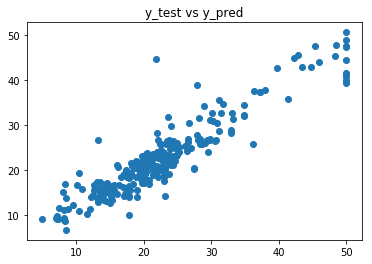

In [16]:
reg.fit(X_train, y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=2,verbose=False)
scoring(reg, y_test, X_test, y_train, X_train)
plot_pred(reg, y_test,X_test, y_train, X_train)

Similar to scikitlearns RandomForestRegressor, the XGBoost library provides a built-in function to plot features ordered by their importance.

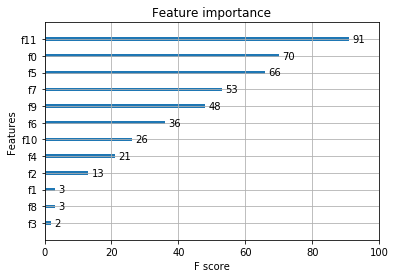

crim 0.050445225
zn 0.0016578967
indus 0.0093538705
chas 0.010022987
nox 0.057359092
rooms 0.6186284
age 0.012754135
dis 0.02756746
rad 0.008066746
tax 0.0187435
ptratio 0.032936893
lstat 0.15246384


In [17]:
xgb.plot_importance(reg)
plt.show()
feature_names = ['crim','zn','indus','chas','nox','rooms'
                 ,'age','dis','rad','tax','ptratio','lstat']
for col,score in zip(feature_names,reg.feature_importances_):
    print(col,score)

# Summary

Regarding the management problem, these results suggest that gradient boosting regression with automatic early stopping is the better model given its low RMSE compared to the all other models and the reduced disparity between RMSE on test vs train data compared to random forest and gradient boost without early stopping. Gradient boosting with early stopping would be my recommendation to management for a machine learning complement to conventional methods for assessing the market value of residential real estate. 